In [1]:
import pandas as pd
import numpy as np

## plotting libraries
from matplotlib import pyplot as plt

## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Read that data into Python and call the dataframe churnData
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
#Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. 
#Convert this column into numeric type using pd.to_numeric function

churnData.dtypes
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
# Check for null values in the DataFrame
print(churnData.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [5]:
# Replace null values
# fill the NaN elements with mean
churnData.fillna(churnData['TotalCharges'].mean(), inplace=True)

# Check for null values in the DataFrame again
print(churnData.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Select the features and target variable
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']

In [7]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [8]:
# Scale the features
trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

# Logistic Regression

In [9]:
model = LogisticRegression() 

model.fit(X_train, y_train)

y_pred_train_log = model.predict(X_train)
y_pred_test_log = model.predict(X_test)

In [10]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_log),
                                          precision_score(y_train_np, y_pred_train_log, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_log, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_log),
                                         precision_score(y_test_np, y_pred_test_log, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.789670,0.797019
1,Precision,0.648833,0.674242
2,Recall,0.447351,0.470899


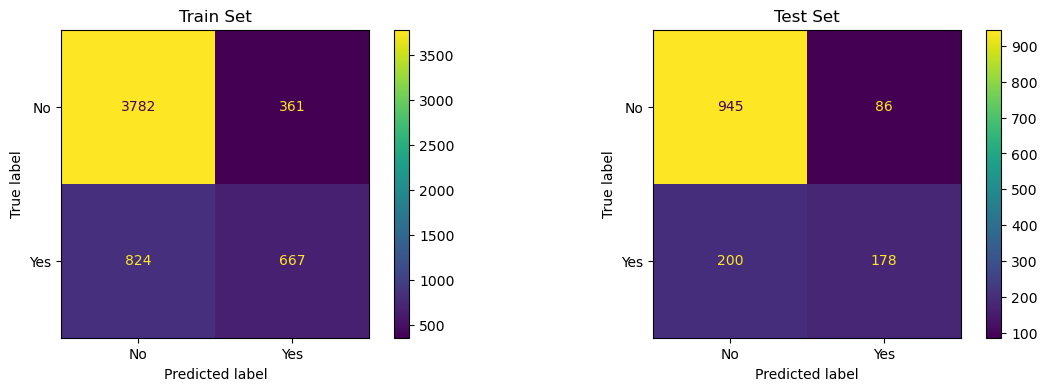

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_log)
cm_test = confusion_matrix(y_test_np, y_pred_test_log)

ConfusionMatrixDisplay(cm_train, display_labels=model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Knn Classifier Model

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform') 
knn_model.fit(X_train, y_train) 

y_pred = knn_model.predict(X_test) 

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [13]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_knn),
                                          precision_score(y_train_np, y_pred_train_knn, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_knn, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_knn),
                                         precision_score(y_test_np, y_pred_test_knn, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_knn, pos_label='Yes')]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.808307,0.784244
1,Precision,0.757842,0.694737
2,Recall,0.405097,0.349206


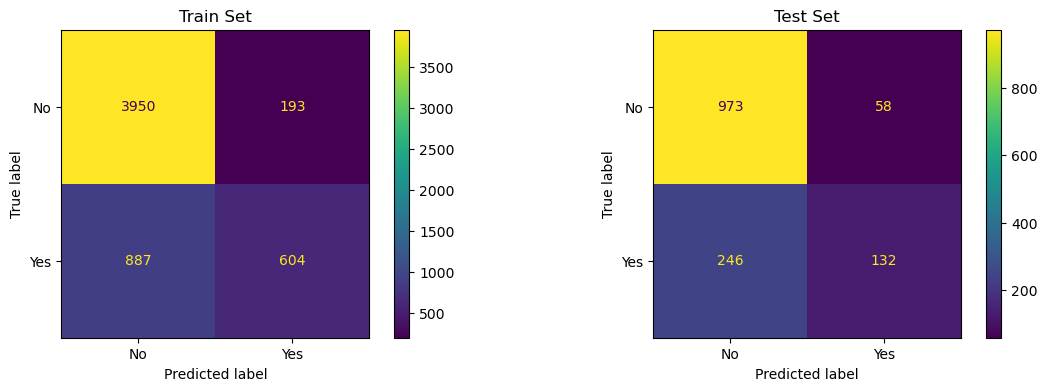

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_knn)
cm_test = confusion_matrix(y_test_np, y_pred_test_knn)

ConfusionMatrixDisplay(cm_train, display_labels=model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Comparing KNN and Logistic Regression Models

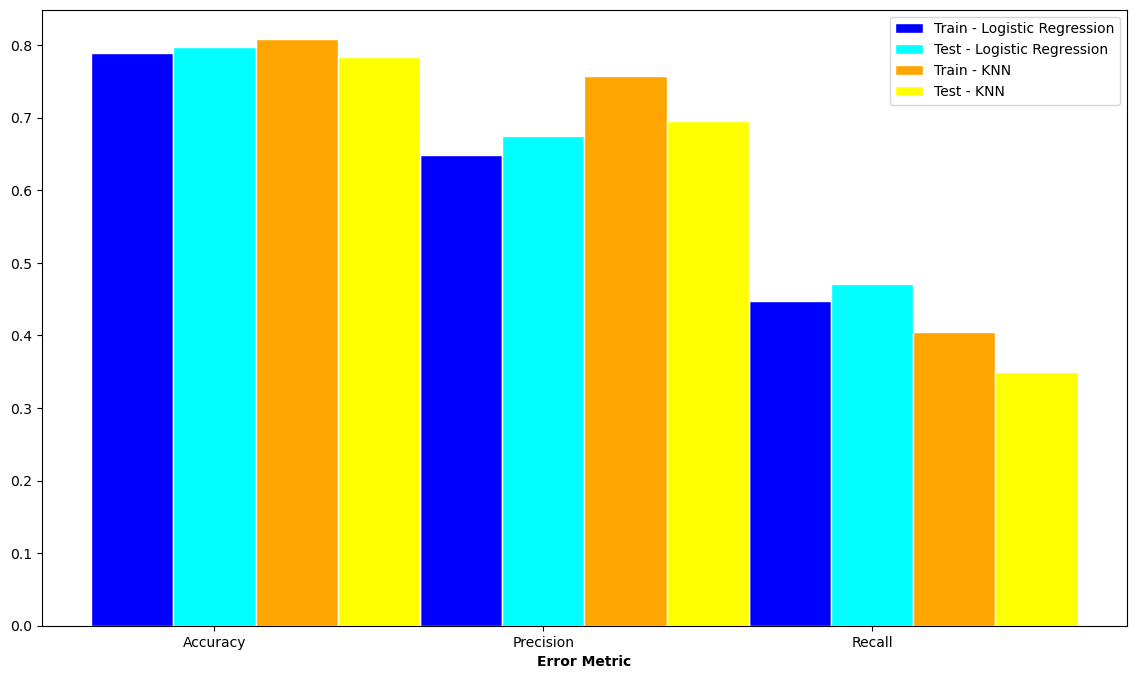

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(14, 8))

# Set the width of the bars
barWidth = 0.25

# Set the height of the bars
bars_train_log = performance_log['Train']
bars_test_log = performance_log['Test']
bars_train_knn = performance_knn['Train']
bars_test_knn = performance_knn['Test']

# Set the position of the bars on the x-axis
r1 = np.arange(len(bars_train_log))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plot the bars
plt.bar(r1, bars_train_log, color='blue', width=barWidth, edgecolor='white', label='Train - Logistic Regression')
plt.bar(r2, bars_test_log, color='cyan', width=barWidth, edgecolor='white', label='Test - Logistic Regression')
plt.bar(r3, bars_train_knn, color='orange', width=barWidth, edgecolor='white', label='Train - KNN')
plt.bar(r4, bars_test_knn, color='yellow', width=barWidth, edgecolor='white', label='Test - KNN')

# Add xticks on the middle of the group bars
plt.xlabel('Error Metric', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars_train_log))], ['Accuracy', 'Precision', 'Recall'])

# Add a legend
plt.legend()

# Show the chart
plt.show()

# Decision Tree Classifier

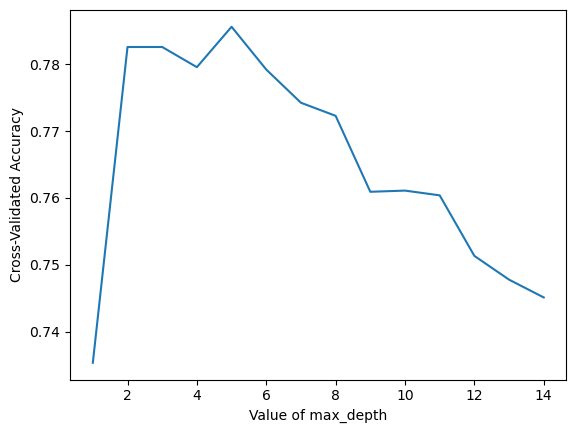

The best value of max_depth is 5


In [16]:
# get the best max_depth 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Create Decision Tree model
dt_model = DecisionTreeClassifier()

# Create list of values of max_depth to evaluate
max_depths = range(1, 15)

# Evaluate Decision Tree model for each value of max_depth using 10-fold cross-validation
scores = []
for depth in max_depths:
    dt_model.set_params(max_depth=depth)
    # no need to scale the train and test set, so X_train istead of X_train_sc
    score = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy').mean()
    scores.append(score)

# Plot the results
plt.plot(max_depths, scores)
plt.xlabel('Value of max_depth')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Select best value of max_depth based on cross-validation results
best_max_depth = max_depths[np.argmax(scores)]
print(f"The best value of max_depth is {best_max_depth}")

In [17]:
def get_model_DecisionTreeClassifier(X_tn, X_tt, y_tn, y_tt, max_depth):
    
    dt_model = DecisionTreeClassifier(max_depth)  
    
    dt_model.fit(X_tn, y_tn) 

    y_pred = dt_model.predict(X_tt) 
    
    return dt_model

In [18]:
dt_model = DecisionTreeClassifier(max_depth = best_max_depth)

dt_model.fit(X_train, y_train) 

y_pred = dt_model.predict(X_test) 

y_pred_train_td = dt_model.predict(X_train)
y_pred_test_td = dt_model.predict(X_test)

In [19]:
X_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
5305,43,0,78.8,3460.30
3351,16,0,53.9,834.15
5177,36,1,84.1,3021.60
1460,5,0,85.3,424.15
4010,1,0,20.4,20.40
...,...,...,...,...
1293,67,0,111.2,7530.80
4023,42,0,19.8,849.90
5200,70,0,106.5,7397.00
3775,41,1,98.4,4187.75


<BarContainer object of 4 artists>

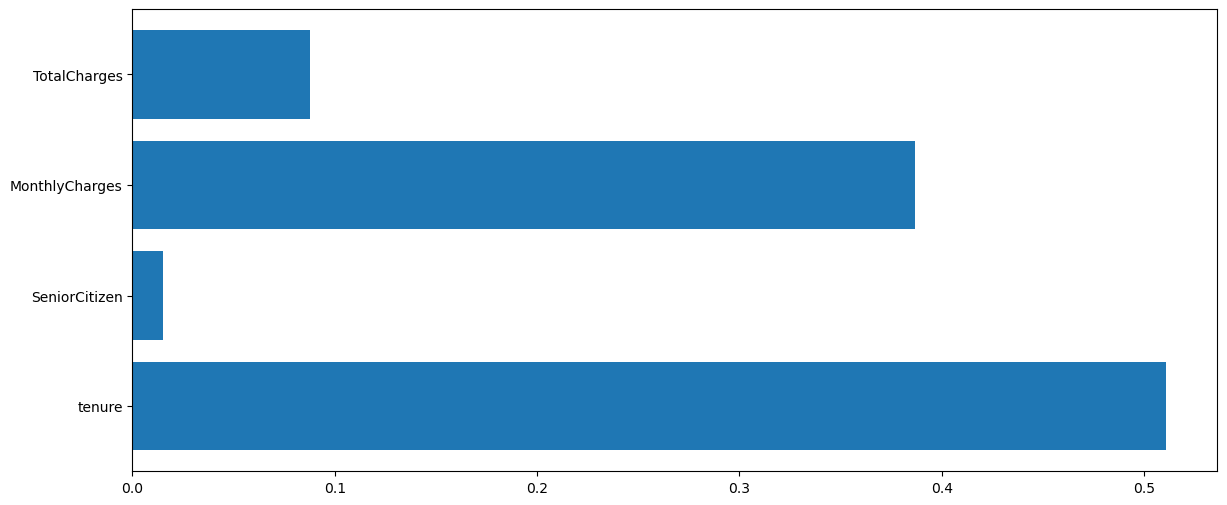

In [20]:
plt.figure(figsize=(14,6))
plt.barh(X.columns,dt_model.feature_importances_)

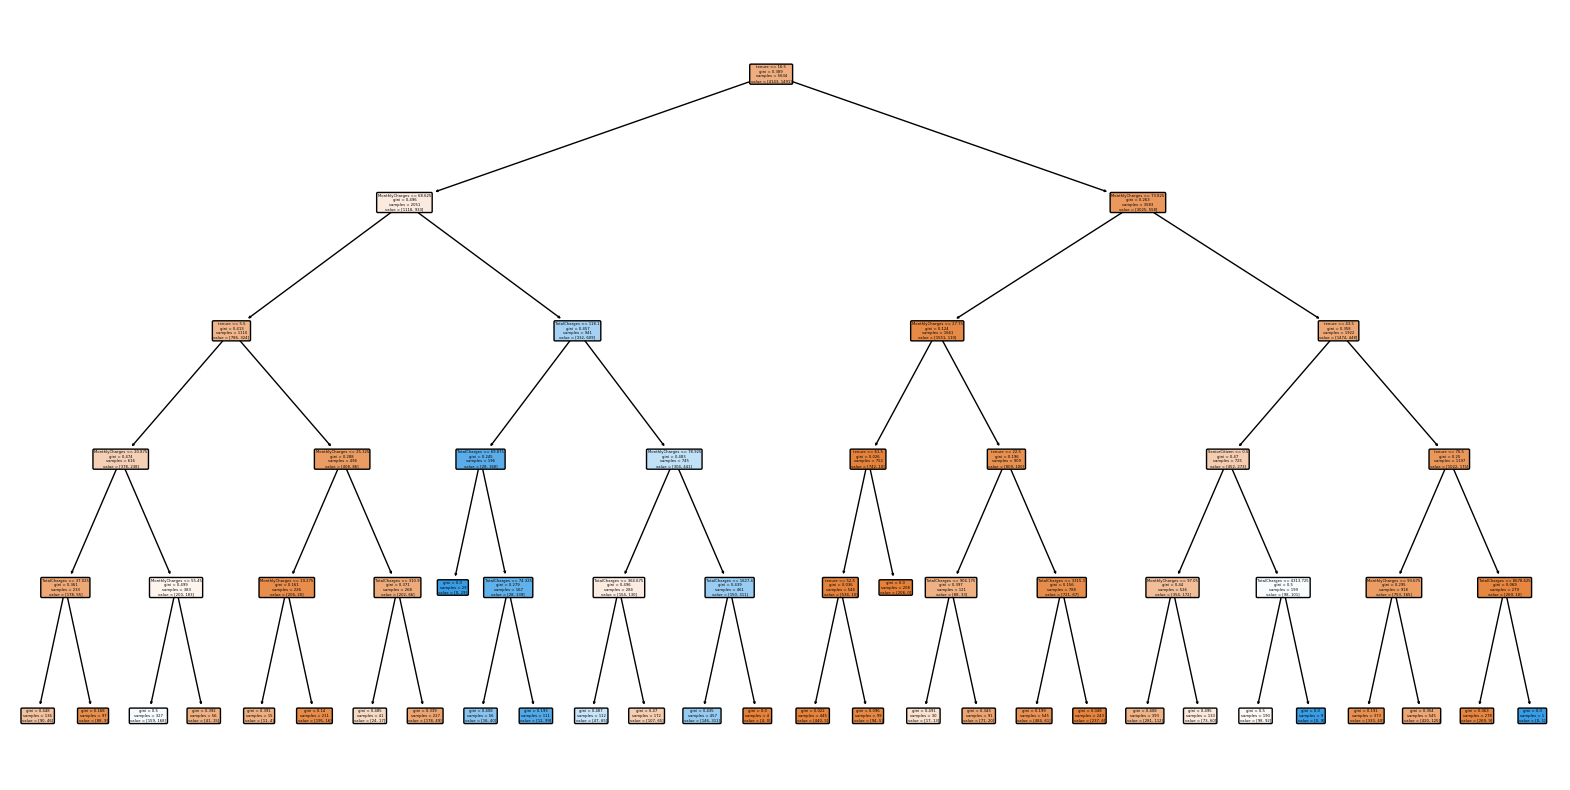

In [21]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(dt_model, 
          filled = True, 
          rounded = True,  
          # show the feature names
          feature_names = X_train.columns)
plt.show()

In [22]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_td = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_td),
                                          precision_score(y_train_np, y_pred_train_td, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_td, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_td),
                                         precision_score(y_test_np, y_pred_test_td, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_td, pos_label='Yes')]})

display(performance_td)

,Error_metric,Train,Test
0,Accuracy,0.796060,0.791341
1,Precision,0.655172,0.648936
2,Recall,0.484239,0.484127


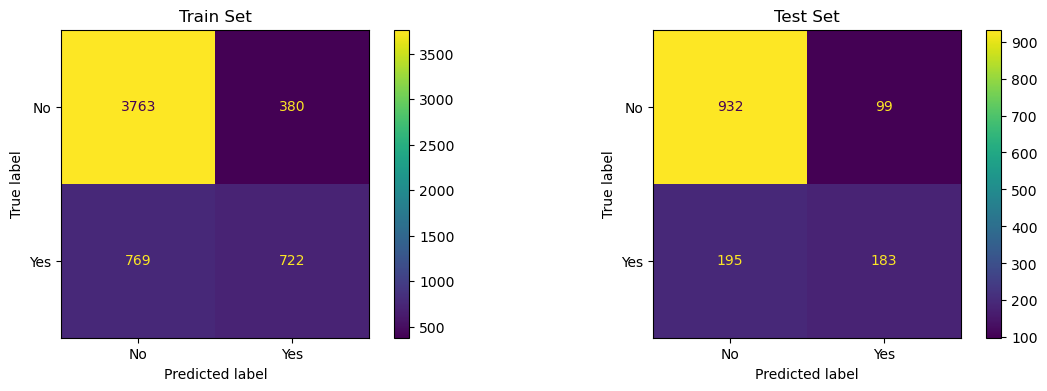

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_td)
cm_test = confusion_matrix(y_test_np, y_pred_test_td)

ConfusionMatrixDisplay(cm_train, display_labels=dt_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=dt_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

# Cross Validation

In [24]:
model_pipeline = [model, knn_model, dt_model]
model_names = ['Logistical Regression', 'K-Nearest Neighbors', 'Decision Tree']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kurtu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'Logistical Regression': 0.7894936573321745, 'K-Nearest Neighbors': 0.7802662408828087, 'Decision Tree': 0.7857702530768552}


In [25]:
print("Comparing the 3 regression scores we find \n")

compare_models = pd.DataFrame([scores], index=["score"])
compare_models

Comparing the 3 regression scores we find 



,Logistical Regression,K-Nearest Neighbors,Decision Tree
score,0.789494,0.780266,0.78577


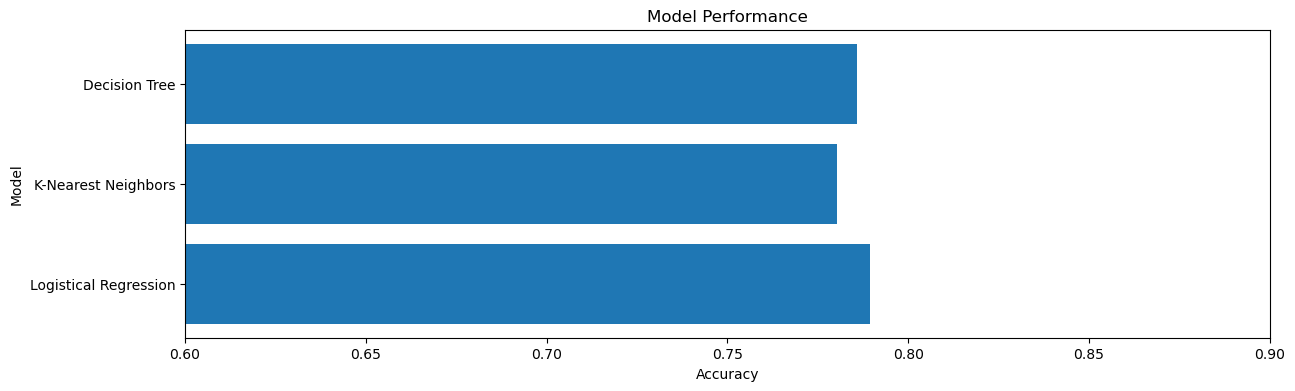

In [26]:
import matplotlib.pyplot as plt
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14,4))

# Create the horizontal bar chart
ax.barh(list(scores.keys()), list(scores.values()))

# Set the title and axis labels
ax.set_title('Model Performance')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Model')

# Set the x-axis range
ax.set_xlim([0.6, 0.9])

# Display the chart
plt.show()

# Imbalance in the Dataset

## Using Pandas Sample

In [34]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Check the inbalance
y_train.value_counts()

No     4143
Yes    1491
Name: Churn, dtype: int64

In [36]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

No     4143
Yes    4143
Name: Churn, dtype: int64

## Upsampling (SMOTE)

In [38]:
# apply to upsampled train sets and get models
model_sm = get_model_LogisticRegression(X_train_sm, X_test, y_train_sm, y_test)
knn_model_sm = get_model_KNeighborsClassifier(X_train_sm, X_test, y_train_sm, y_test, n_neighbors = best_n_neighbor)
dt_model_sm = get_model_DecisionTreeClassifier(X_train_sm, X_test, y_train_sm, y_test, max_depth = best_max_depth)

NameError: name 'get_model_LogisticRegression' is not defined